In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display

In [ ]:
data = np.loadtxt(open('/content/sample_data/mnist_train_small.csv','rb'),delimiter=',')
data = data[:,1:]
dataNorm = data/np.max(data)
dataT = torch.tensor(dataNorm).float()

In [ ]:
def createTheMNISTAE():
  class Autoencoder(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,250)
      self.encoder = nn.Linear(250,50)
      self.latent = nn.Linear(50,250)
      self.decoder = nn.Linear(250,784)
    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.encoder(x))
      x = F.relu(self.latent(x))
      x = self.decoder(x)
      return torch.sigmoid(x)

  autoencoder = Autoencoder()
  lossfun = nn.MSELoss()
  optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
  return autoencoder, lossfun, optimizer

In [ ]:
autoencoder, lossfun, optimizer = createTheMNISTAE()
X = dataT[:5,:]
yHat = autoencoder(X)
print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


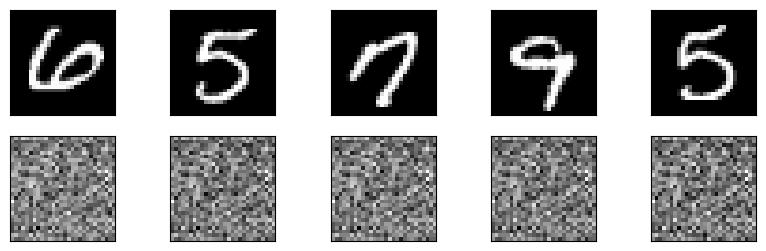

In [ ]:
fig, axe = plt.subplots(2,5,figsize=(10,3))
for i in range(5):
  axe[0,i].imshow(X[i].reshape(28,28),cmap='gray')
  axe[1,i].imshow(yHat[i].detach().reshape(28,28),cmap='gray')
  axe[0,i].set_xticks([])
  axe[0,i].set_yticks([])
  axe[1,i].set_xticks([])
  axe[1,i].set_yticks([])

In [ ]:
def function2trainTheModel():
  epochs = 10000
  autoencoder, lossfun, optimizer = createTheMNISTAE()
  losses = torch.zeros(epochs)
  for epoch in range(epochs):
    randomidx = np.random.choice(dataT.shape[0],size=32)
    X = dataT[randomidx,:]
    yHat = autoencoder(X)
    loss = lossfun(yHat,X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses[epoch] = loss.item()
  return autoencoder, losses

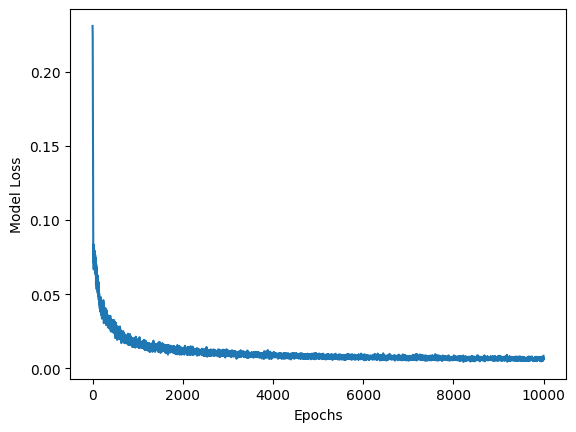

In [ ]:
autoencoder, losses = function2trainTheModel()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.show()

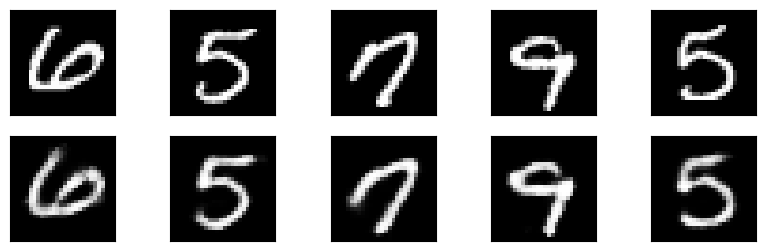

In [ ]:
X = dataT[:5,:]
yHat = autoencoder(X)
fig, axe = plt.subplots(2,5,figsize=(10,3))
for i in range(5):
  axe[0,i].imshow(X[i].reshape(28,28),cmap='gray')
  axe[1,i].imshow(yHat[i].detach().reshape(28,28),cmap='gray')
  axe[0,i].set_xticks([])
  axe[0,i].set_yticks([])
  axe[1,i].set_xticks([])
  axe[1,i].set_yticks([])

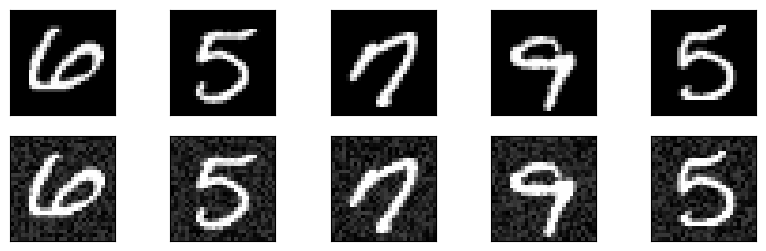

In [ ]:
X = dataT[:10,:]
Xnoise = X + torch.rand_like(X)/4
Xnoise[Xnoise>1] = 1
fig, axs = plt.subplots(2,5,figsize=(10,3))
for i in range(5):
  axs[0,i].imshow(X[i].reshape(28,28),cmap='gray')
  axs[1,i].imshow(Xnoise[i].detach().reshape(28,28),cmap='gray')
  axs[0,i].set_xticks([])
  axs[0,i].set_yticks([])
  axs[1,i].set_xticks([])
  axs[1,i].set_yticks([])

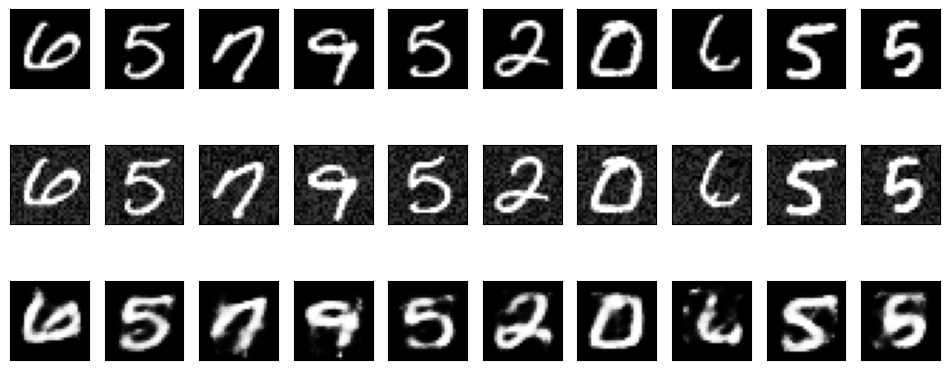

In [ ]:
Y = autoencoder(Xnoise)
fig, axs = plt.subplots(3,10,figsize=(12,5))
for i in range(10):
  axs[0,i].imshow(X[i,:].reshape(28,28).detach(),cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].reshape(28,28).detach(),cmap='gray')
  axs[2,i].imshow(Y[i].reshape(28,28).detach(),cmap='gray')
  axs[0,i].set_xticks([])
  axs[0,i].set_yticks([])
  axs[1,i].set_xticks([])
  axs[1,i].set_yticks([])
  axs[2,i].set_xticks([])
  axs[2,i].set_yticks([])